In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyshtools as pysh    # pysh.__version__ = v4.10.4

plt.style.use('seaborn-v0_8')

---
---
# [1] Load

In [2]:
mag_shcoeffs = pysh.datasets.Mars.Langlais2019()
print(mag_shcoeffs)

kind = 'real'
normalization = 'schmidt'
csphase = 1
lmax = 134
r0 (m) = 3393500.0
error_kind = None
header = None
header2 = None
name = 'Langlais2019'
units = 'nT'
year = None


Text(0.5, 1.0, 'Langlais2019 Magnetic Field Power Spectrum')

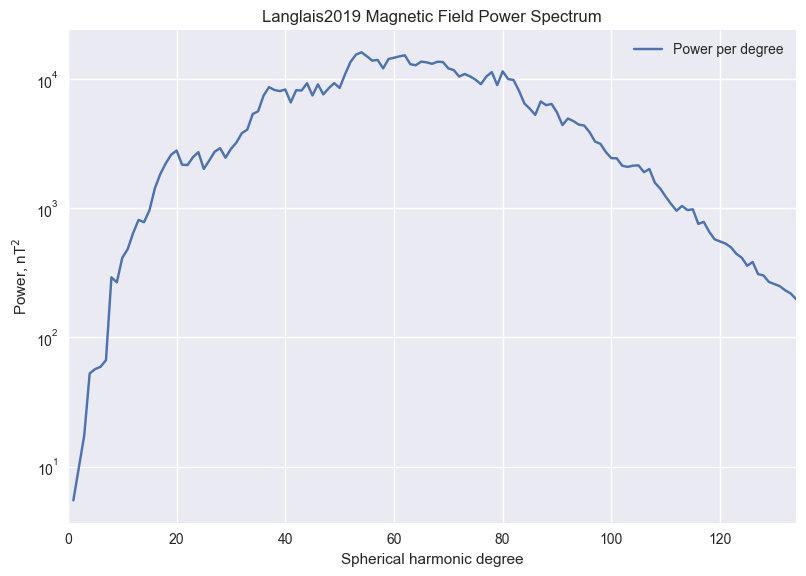

In [3]:
fig, ax = mag_shcoeffs.plot_spectrum(
    function = 'total', 
    show     = False, 
)
ax.set_title('Langlais2019 Magnetic Field Power Spectrum')

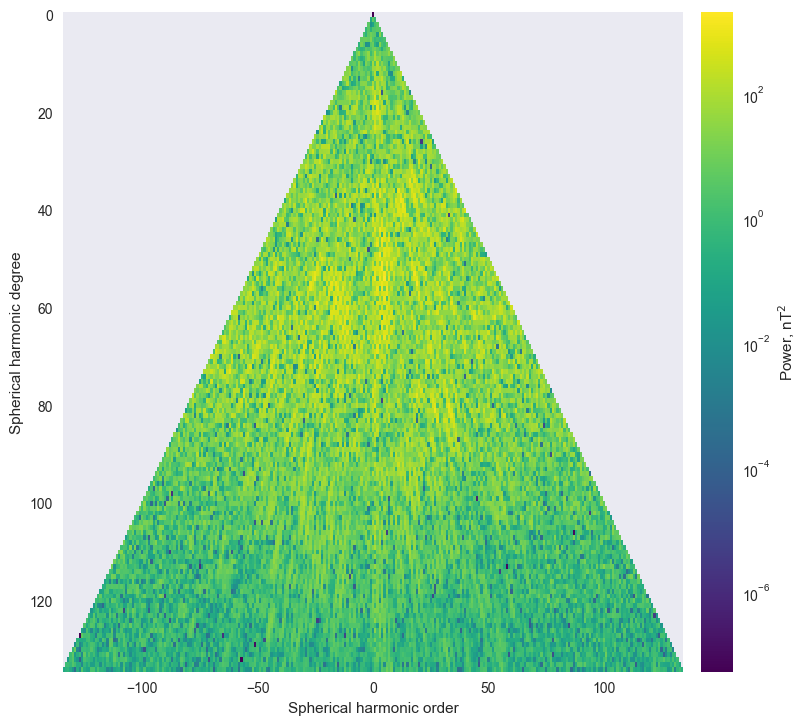

In [4]:
fig, ax = mag_shcoeffs.plot_spectrum2d(function='total', show=False)

grid = DH
nlat = 271
nlon = 541
n = 270
sampling = 2
extend = True
lmax = 134
lmax_calc = 134
a (m)= 3.393500e+06
f = 0.000000e+00
units (magnetic field) = 'nT'
units (potential) = 'nT m'
year = None


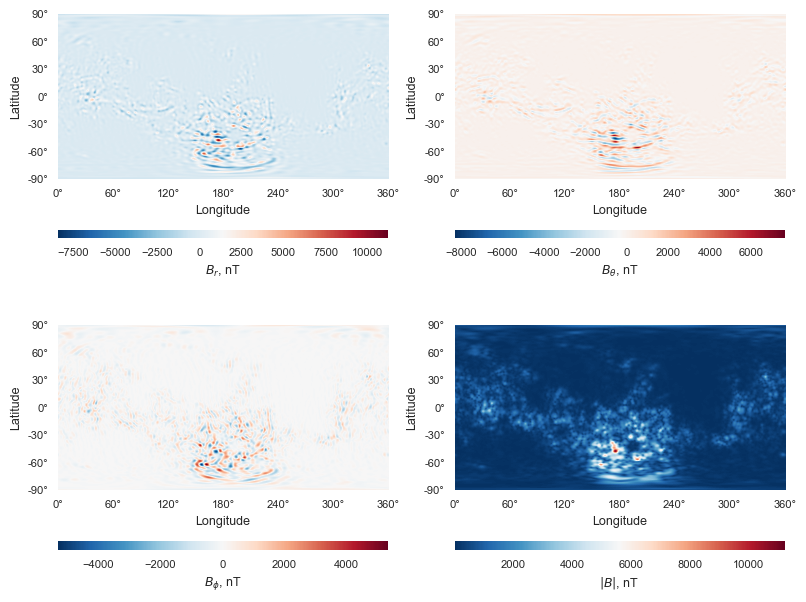

In [5]:
mag_grid = mag_shcoeffs.expand()

print(mag_grid)

# pysh.utils.figstyle(figsize=(9, 6))
fig, ax = mag_grid.plot(cmap='RdBu_r', show=False)

# pysh.utils.figstyle(rel_width=0.75)

![](https://files.catbox.moe/x56c9m.png)

---
---
# [2] Compare with earth


In [6]:
earth_mag_clm = pysh.datasets.Earth.WDMAM2_800()
earth_mag_clm

kind = 'real'
normalization = 'schmidt'
csphase = 1
lmax = 800
r0 (m) = 6371200.0
error_kind = None
header = None
header2 = None
name = 'WDMAM2_800'
units = 'nT'
year = None

Text(0.5, 1.0, "Earth's Lithospheric Magnetic Field (WDMAM) Power Spectrum (Lesur et al. 2016)")

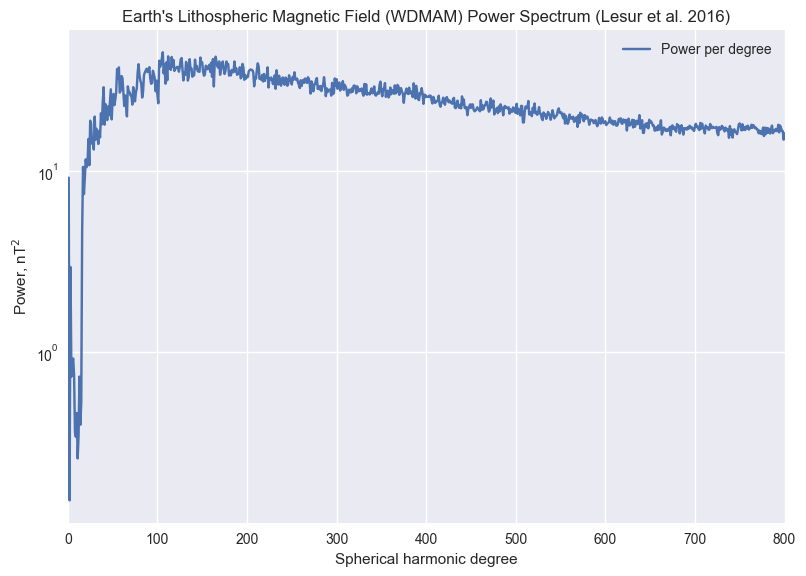

In [7]:
fig, ax = earth_mag_clm.plot_spectrum(
    function = 'total', 
    show     = False, 
)
ax.set_title('Earth\'s Lithospheric Magnetic Field (WDMAM) Power Spectrum (Lesur et al. 2016)')

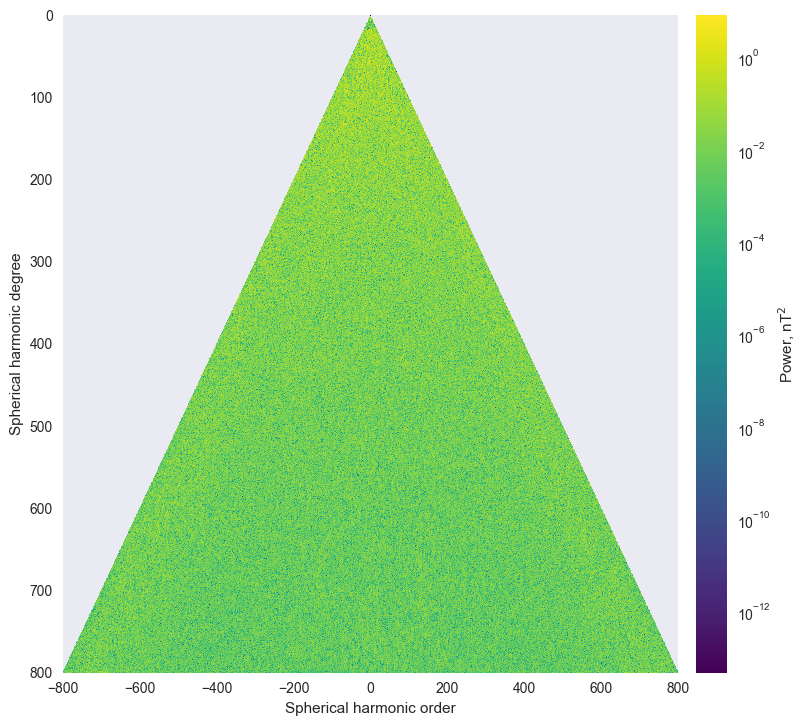

In [8]:
fig, ax = earth_mag_clm.plot_spectrum2d(function='total', show=False)

grid = DH
nlat = 1603
nlon = 3205
n = 1602
sampling = 2
extend = True
lmax = 800
lmax_calc = 800
a (m)= 6.371200e+06
f = 0.000000e+00
units (magnetic field) = 'nT'
units (potential) = 'nT m'
year = None


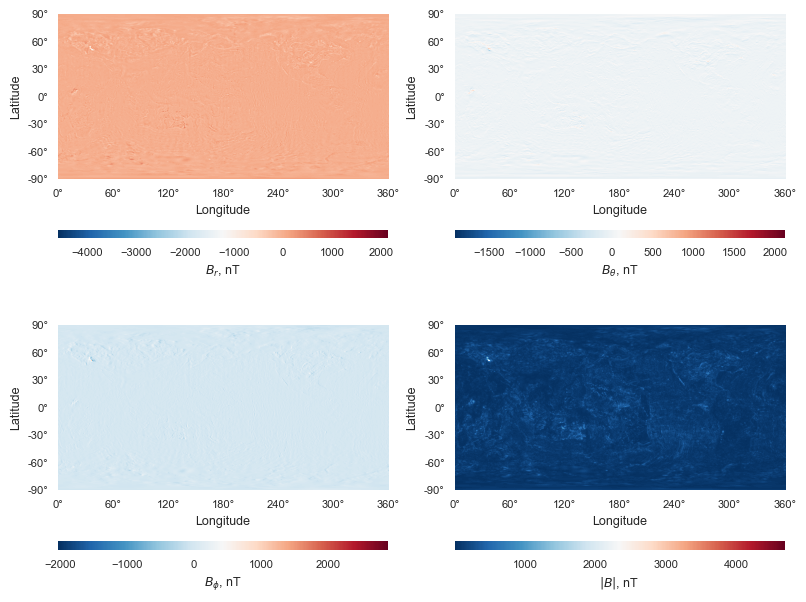

In [9]:
earth_mag_grid = earth_mag_clm.expand()

print(earth_mag_grid)

# pysh.utils.figstyle(figsize=(9, 6))
fig, ax = earth_mag_grid.plot(cmap='RdBu_r', show=False)

---
---
# [3] topo V1 DEM

In [10]:
import xarray as xr
import rioxarray
import zarr
import pooch

In [11]:
fpath_dem_zarrzip = pooch.os_cache('redplanet') / 'Crust' / 'topo' / 'Mars_MGS_MOLA_DEM_mosaic_global_463m_reprojected.zarr.zip'

dat_dem_xr = xr.open_zarr(fpath_dem_zarrzip)

## The following line is needed since `xarray.open_zarr` returns an `xarray.Dataset`. The first data variable 'Mars_MGS_MOLA_DEM_463m_v2' is the desired DEM data, but the other data variable 'spatial_ref' is the CRS info from reprojection. We want our final data as an `xarray.DataArray` for convenience, and we want to move the 'spatial_ref' to coordinate for rioxarray compliance.
dat_dem_xr = (
    dat_dem_xr
    .Mars_MGS_MOLA_DEM_463m_v2
    .rio.write_crs(
        dat_dem_xr.spatial_ref.crs_wkt
    )
)

_ = dat_dem_xr.attrs.pop('grid_mapping', None)

dat_dem_xr

<xarray.DataArray 'Mars_MGS_MOLA_DEM_463m_v2' (lat: 23041, lon: 46081)> Size: 2GB
dask.array<open_dataset-Mars_MGS_MOLA_DEM_463m_v2, shape=(23041, 46081), dtype=int16, chunksize=(8192, 8192), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float64 184kB -89.99 -89.99 -89.98 ... 89.98 89.99 90.0
  * lon          (lon) float64 369kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
    spatial_ref  int32 4B 0
Attributes:
    metadata:  {'description': "For description of modifications and source c...
    units:     meters

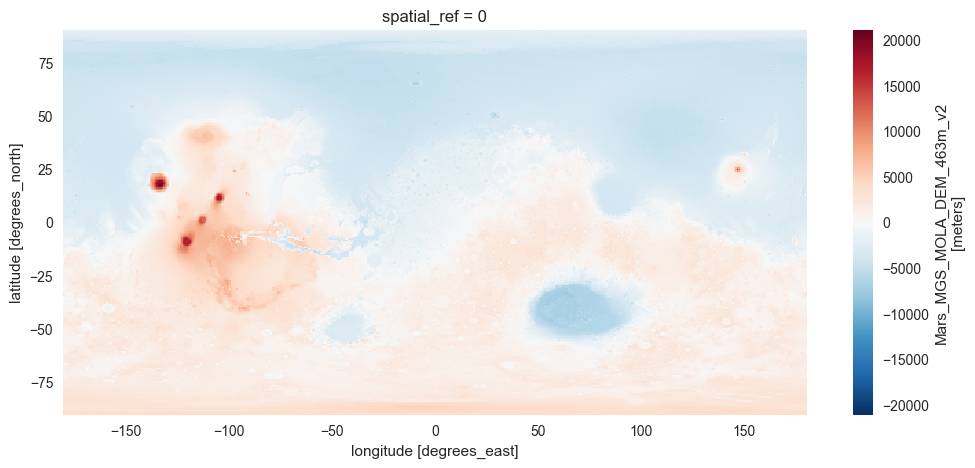

In [12]:
topo_xr = dat_dem_xr.sel(
    lon = np.linspace(-180,180,mag_grid.nlon), 
    lat = np.linspace(-90,90,mag_grid.nlat), 
    method = 'nearest', 
)

topo_xr.plot(
    figsize=(12,5)
)

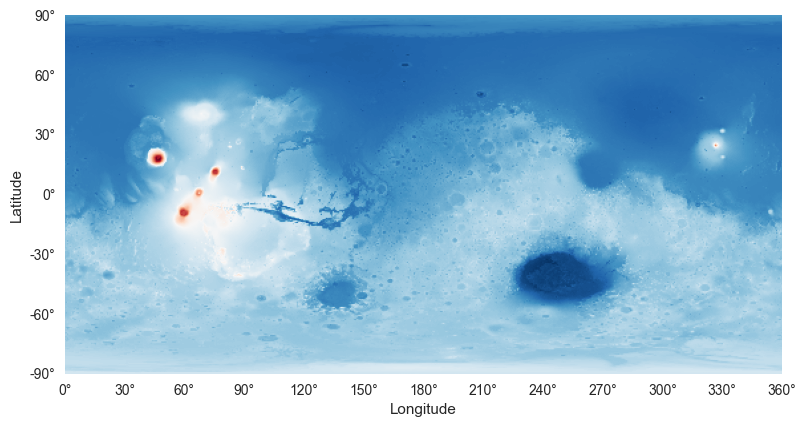

In [13]:
topo_grid = pysh.SHGrid.from_array(topo_xr[::-1])

fig, ax = topo_grid.plot(cmap='RdBu_r', show=False)


---
---
# [4] spectral

In [14]:
mag_grid

grid = DH
nlat = 271
nlon = 541
n = 270
sampling = 2
extend = True
lmax = 134
lmax_calc = 134
a (m)= 3.393500e+06
f = 0.000000e+00
units (magnetic field) = 'nT'
units (potential) = 'nT m'
year = None

In [15]:
# latgrid, longrid = np.meshgrid(mag_grid.total.lats(), mag_grid.total.lons(), indexing='ij')

# window = (-40 < latgrid) & (latgrid < -30) & (10 < longrid) & (longrid < 30)
# window += (0 < latgrid) & (latgrid < 30) & (60 < longrid) & (longrid < 80)
# window += (-70 < latgrid) & (latgrid < -40) & (130 < longrid) & (longrid < 150)
# window += (20 < latgrid) & (latgrid < 40) & (125 < longrid) & (longrid < 145)
# window += (10 < latgrid) & (latgrid < 30) & (220 < longrid) & (longrid < 250)

import numpy as np

# Assume mag_grid is already defined or imported appropriately
latgrid, longrid = np.meshgrid(mag_grid.total.lats(), mag_grid.total.lons(), indexing='ij')

# Define each rectangle as an individual array: [lat_bottom, lat_top, lon_left, lon_right]
windows = [
    [-60, -35, 120, 160],
    [-60, -20, 220, 290],
    # [0, 30, 250, 290],
]

# Initialize the window with all False
window = np.zeros_like(latgrid, dtype=bool)

# Apply each rectangle to create the overall window
for window_bounds in windows:
    lat_bottom, lat_top, lon_left, lon_right = window_bounds
    window |= ((lat_bottom < latgrid) & (latgrid < lat_top) &
               (lon_left < longrid) & (longrid < lon_right))

# Now `window` contains True for all the specified regions

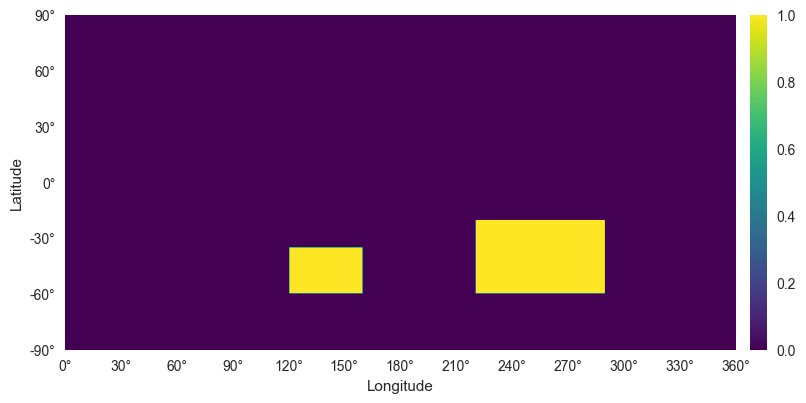

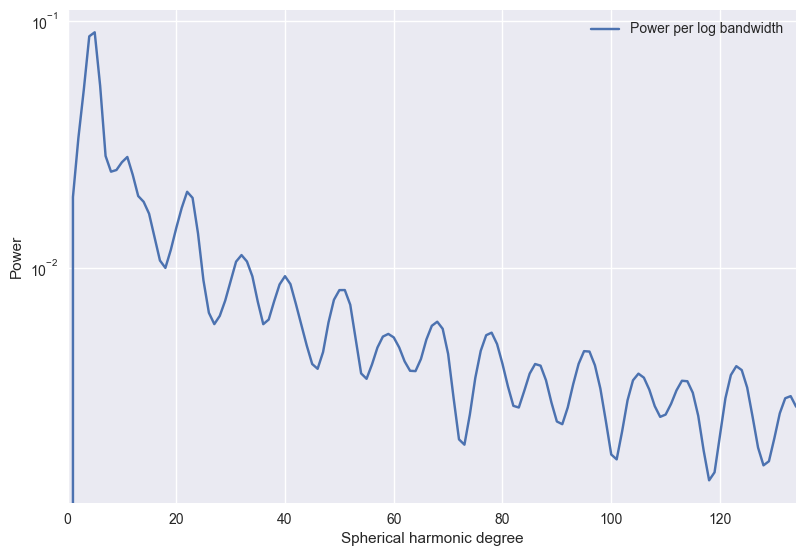

In [16]:
grid_window = pysh.SHGrid.from_array(window.astype(np.float64))
fig, ax = grid_window.plot(colorbar='right', show=False)

coeffs_window = grid_window.expand()
fig2, ax2 = coeffs_window.plot_spectrum(unit='per_dlogl', show=False)

power_window = coeffs_window.spectrum()

---
## apply

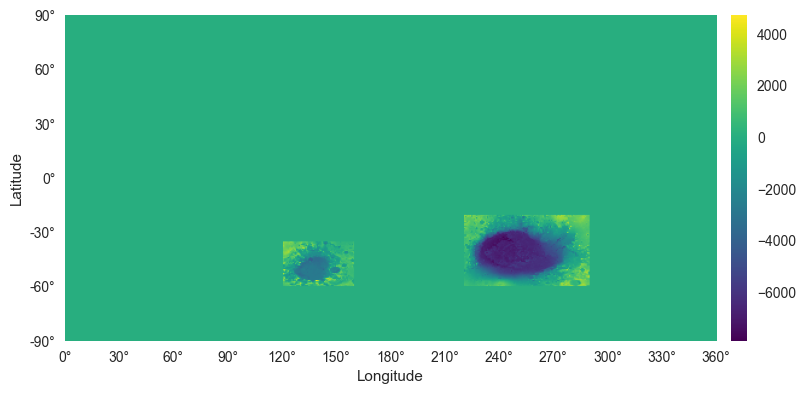

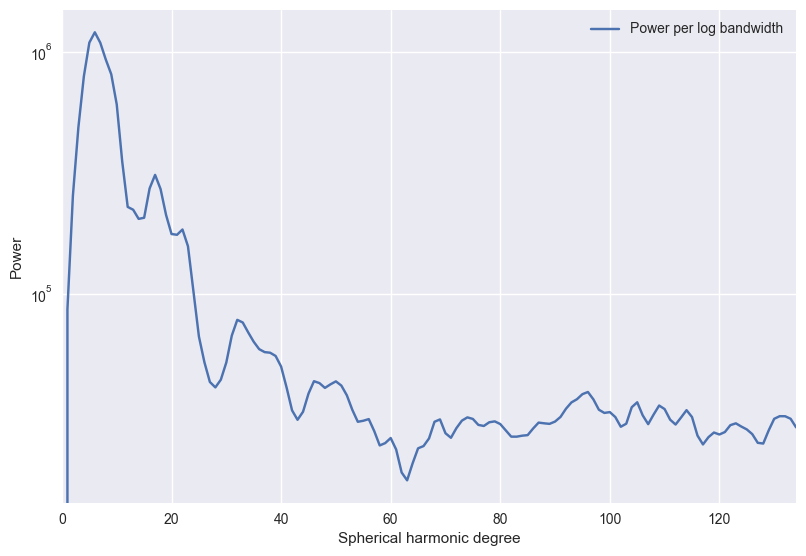

In [17]:
mag_grid_local = topo_grid * grid_window
mag_grid_local.plot(colorbar='right', show=False)

mag_shcoeffs_local = mag_grid_local.expand()
mag_shcoeffs_local.plot_spectrum(unit='per_dlogl', show=False)

mag_power_local = mag_shcoeffs_local.spectrum()

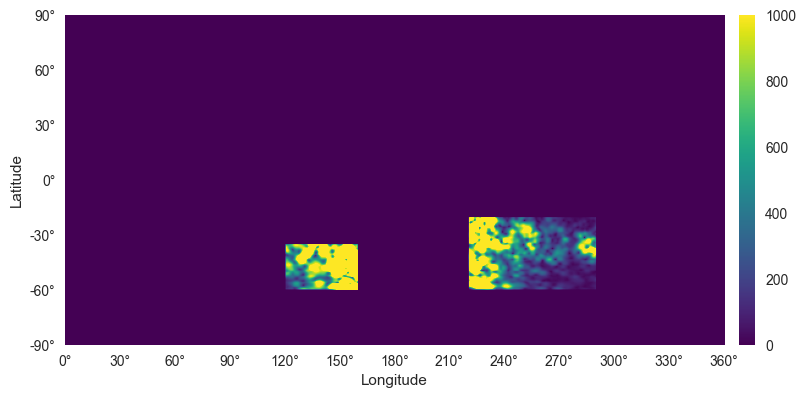

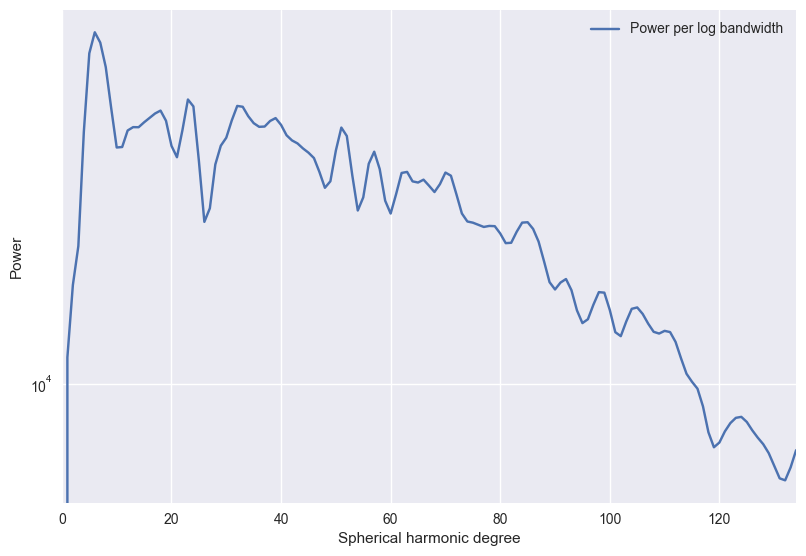

In [18]:
mag_grid_local = mag_grid.total * grid_window
mag_grid_local.plot(colorbar='right', show=False, cmap_limits=[0,1000])

mag_shcoeffs_local = mag_grid_local.expand()
mag_shcoeffs_local.plot_spectrum(unit='per_dlogl', show=False, )

mag_power_local = mag_shcoeffs_local.spectrum()

---
---
# [5] SIMPLE coupling matrix

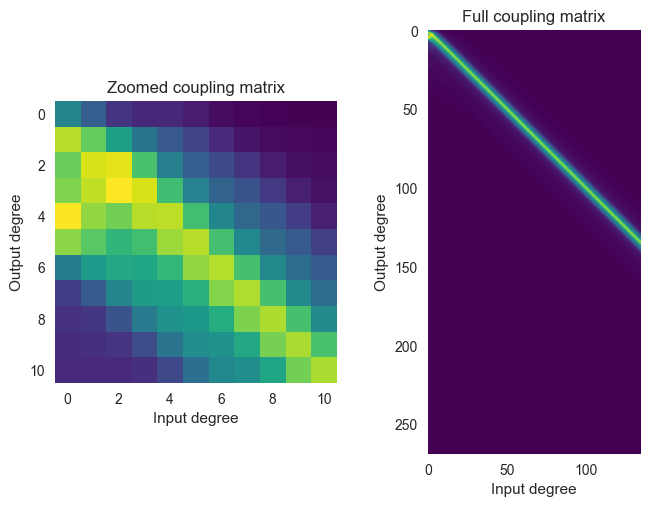

In [26]:
coupling_matrix = pysh.spectralanalysis.SHMTCouplingMatrix(mag_grid.total.lmax, power_window)

fig, (col1, col2) = plt.subplots(1, 2)
col1.imshow(coupling_matrix, cmap='viridis')
col1.grid(False)
col1.set(xlabel='Input degree', ylabel='Output degree', xlim=(-0.5, 10.5), ylim=(10.5, -0.5),
         title='Zoomed coupling matrix');
col2.imshow(coupling_matrix, cmap='viridis')
col2.grid(False)
col2.set(xlabel='Input degree', ylabel='Output degree', title='Full coupling matrix');

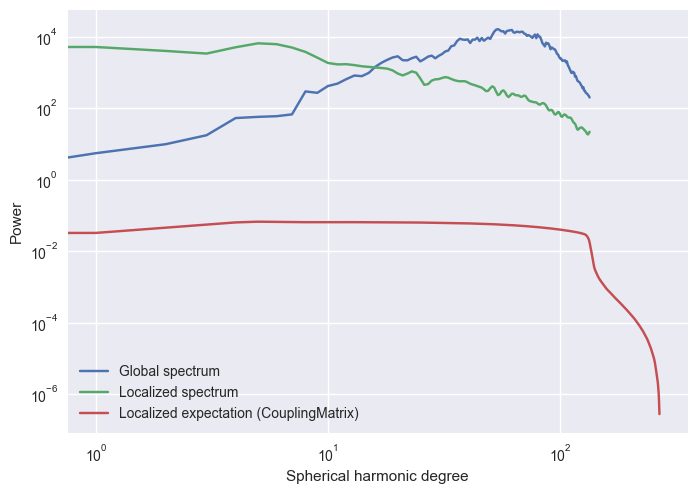

In [31]:
a = 160  # scale length
degrees = np.arange(mag_grid.total.lmax+1, dtype=float)
power = 1. / (1. + (degrees / a) ** 2) ** 1.5

power_local2 = np.dot(coupling_matrix, power)
power_local3 = pysh.spectralanalysis.SHBias(power_window, power)

mag_power_global = mag_shcoeffs.spectrum()

fig, ax = plt.subplots(1, 1)
ax.plot(degrees, mag_power_global, label='Global spectrum')
ax.plot(degrees, mag_power_local, label='Localized spectrum')
ax.plot(power_local2, label='Localized expectation (CouplingMatrix)')
# ax.plot(power_local3, 'x', label='Localized expectation (SHBias)')
ax.legend(loc=3)
ax.set(yscale='log', xscale='log', ylabel='Power', xlabel='Spherical harmonic degree');

---
---
# [6] ADVANCED coupling matrix

In [ ]:
lmax_ocean = 9
lmax_land = 21
nwins = 10

ocean_windows = pysh.SHWindow.from_mask(ocean_mask.to_array(), lmax_ocean, nwin=nwins)
land_windows = pysh.SHWindow.from_mask(land_mask.to_array(), lmax_land, nwin=nwins)
